### <font color = red> *** FILL YOUR INFORMATION BELOW *** </font>
(Name) Saaga Kovapohja<br>
(Student number) 2508482 <br>
(UTU email) saskov@utu.fi  <br>
(Date) 23.11.2025  <br>

#### General Guidance for Exercises

- **Complete all tasks**: Make sure you finish the quiz in moodle. All the answers can be found using the notebook. If you cannot get all the answers correct on the first try, come back to the notebook and try again.
- **Code clarity**: Write clear and readable code. Include comments to explain what your code does.
- **Effective visualizations**: Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- **Notebook organization**: You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- **Submission**: Once you have finished the quiz, submit your notebook in the `.ipynb` and `.pdf` formats as the answer to the assignment. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.

#### Grading Criteria
- The grading scale is **Fail/Pass/Pass with honors (+1)**.
  - To **pass**, you must complete the required parts, until the mark ***END OF REQUIRED PARTS***. Get a "Pass" grade in the moodle quiz.
  - To achieve **Pass with honors**, meet the requirements to get a **pass** and complete the bonus exercises.

#### Technical Issues
- **Initial troubleshooting**: If you encounter problems, start with an online search to find solutions, but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
- **External sources**: Cite all external sources used, whether for code or explanations.
- **Help resources**: If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email to the course assistants. </span>.

#### Use of AI and Large Language Models
- We **do not encourage** the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
  - **Documentation**: Describe how you used the AI tools in your work, including your input and how the output was beneficial.

#### Time Management
- **Avoid last-minute work**: Do not leave your work until the last moment. No feedback will be available during weekends.

#### Additional Notes
- You can find the specific deadlines and session times for each assignment on the Moodle course page.
- Your `.ipynb` notebook is expected to be **run to completion**, meaning it should execute without errors when all cells are run in sequence.


### <font color = red> Packages needed for this exercise: </font>


In [181]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# classes and functions for clustering exercises
from matplotlib.patches import Ellipse
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

# This forces plots to be shown inline in the notebook
%matplotlib inline

The exercise can be done without importing anyting else. You can use other packages, but bear in mind that if you are importing many new packages, you may be complicating your answer.


<div class="alert alert-block alert-warning">
    <h1><center> START OF EXERCISES </center></h1>

In this task you will cluster shopping centre customers by their behaviour and demographics. This is called "customer segmentation". First you will spend some time exploring and preprocessing the data.

##  <font color = dimgrey> 1. Introduction to the dataset </font>

This is a toy dataset (datasets that are relatively small and simple, but represent interesting real problems are called "toy datasets") of shopping centre customers. We have demographic information, income, and an attribute called spending score which the shopping centre has calculated from the customers' behaviour.

The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| customer_id | - | The identifier of the customer assigned by the mall.
| gender | category | Male/Female. From technical perspective it can also be used as a binary variable.
| age | numeric | The age of the patient in years.
| income | numeric | Yearly income, thousands of dollars.
| spending_score | numeric | Integer 1-100, higher means spends more at shopping centre.

The `customer_id` field is technically a categorical field. However, such fields are rarely used in data science, since they either tell us nothing about the customer, if the customer is new, or tell us too much by uniquely identifying the customer when training machine learning models.

## Reading data

It is good practice to read the features in using their correct types instead of fixing them later. Below, there is ready-made code for you to read in the data, using the data types and column names listed in the above table. Don't change the name of the variable, _data_. Some later parts in the notebook assume this is the name of your dataframe. <font color = red> If you have the dataset in the same folder as this notebook, the path already given to you should work. </font>


In [182]:
 # --- READ IN DATA (no need to change) --------
data_path = "shopping_centre.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'customer_id':'category',
                                       'gender':'category',
                                       'age': 'int',
                                       'income': 'float',
                                       'spending_score':'int'})

Normally, customer id would be discarded at this stage. However, in a clustering task, in the end you would be interested which cluster each customer belongs to. So we can keep it even if we do not need it for data analysis.

***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types:
   - Create two lists named **numeric_features** and **categorical_features**. 
   - These lists should contain the **names** of the features based on their types:
     - Numeric features (e.g., `age`)
     - Categorical features (`gender`. Don't put `customer_id` in there)

When working with DataFrames, it is often useful to organize column names into lists. This practice simplifies data manipulation and analysis. Once the feature names are organized, you can easily select, filter, or apply operations to specific groups of features. This also helps to avoid typing errors and reduces repetition.

For example, once you create your list of numeric features, you can select all columns containing numeric data with the following command:

```python
data[numeric_features]


In [183]:
# --- Your code here for 1 a) ---

# first 5 rows of data
print(data.head()) 

# the lists
numeric_features = ["age", "income", "spending_score"]
categorical_features = ["gender"]


  customer_id  gender  age  income  spending_score
0        0001    Male   19    15.0              39
1        0002    Male   21    15.0              81
2        0003  Female   20    16.0               6
3        0004  Female   23    16.0              77
4        0005  Female   31    17.0              40


## 2. Why Data Quality Checks Matter

In many data analysis projects, the data is often not collected specifically for analysis purposes. Instead, it may come from various sources or be collected for entirely different reasons. As a result, the data might not be well-formatted and could contain errors or inconsistencies. 

It might be tempting to immediately apply a model to the data "as is," but it is crucial to first **check the data for quality issues**. Ignoring potential data issues can lead to misleading conclusions, undermining the entire analysis. 

One standard routine to ensure data quality is:
1. **Calculate descriptive statistics** for each feature. This gives an overview of the distribution, range, and possible anomalies.
2. **Visualize the features** to check whether the values are realistic and within expected ranges.

This step helps identify outliers, incorrect data entries, or formatting issues, ensuring that your analysis is based on clean and reliable data.

### Descriptive Statistics and Data Types

It's important to note that certain descriptive statistics might not be meaningful for specific types of features. For instance, calculating the "mean" for binary or categorical features may not offer valuable insight. In **pandas** (as in many other data analysis packages), some functions behave differently depending on the data type of the column.

In the following exercises, we will explore:
- **Descriptive statistics** for the dataset.
- How the results and behavior of descriptive functions can vary based on the data type (e.g., numeric vs. categorical features).


***Exercise 2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [184]:
# --- 2 a) Print the feature types of your dataset --- #
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   customer_id     200 non-null    category
 1   gender          200 non-null    category
 2   age             200 non-null    int64   
 3   income          200 non-null    float64 
 4   spending_score  200 non-null    int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 7.1 KB
None


***Exercise 2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [185]:
# --- Your code for 2 b) --- #
data.describe()

,age,income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


***Exercise 2 c)*** Did you get all of the features statistics or not? What do you think happened?

**Answer:**
The method didn't give statistics for all of the features. It only gave statistics for the 3 numeric features and excluded the 2 categorical features. That's probably just how the method works as default.



***Exercise 2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [186]:
# 2 d) Your code here #

# there's only one categorical feature: gender
subset = data[categorical_features]
subset.describe()

,gender
count,200
unique,3
top,Female
freq,112


Now, we will explore **what happens if the data is read using the default settings** (i.e., without specifying the data types for the features). In this case, we are **not providing information about the data types (dtypes)** to `pd.read_csv`, meaning no additional arguments are passed when loading the data.

Run the cell below (you don't need to modify the code) and observe the output of the data that has been incorrectly read due to missing dtype information. Then, compare this output with the data you loaded earlier using the correct dtypes, and check the descriptive statistics.


In [187]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in.
wrongly_read_data.describe()


,customer_id,age,income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



***Exercise 2 e)*** 
Based on the output above, can you identify what went wrong with the data presentation? Why was it important to correctly define the data types when loading the dataset?

**Answer:**
Without defining the data types manually, pandas assumes the data types. With the output above customer_id was interpreted as one of the numeric features, even though its supposed to be a categorical one. Since the data type was assumed wrong, the descriptives for the customer_id feature are wrong in the output above. False results and misinterpretations are also the reason why it's important to define the data types correctly.

## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.


***Exercise 3 a)*** Plot histograms for the **numeric features** to visually inspect their distributions. (Refer to the tutorial if you need assistance with plotting.)


_tip: When using `plt.subplots()`, if you provide only one argument for the grid size (e.g., `plt.subplots(3)`), it will create a **one-dimensional grid**. You can then index this grid with a single index, making it easier to loop through and assign plots to each subplot.


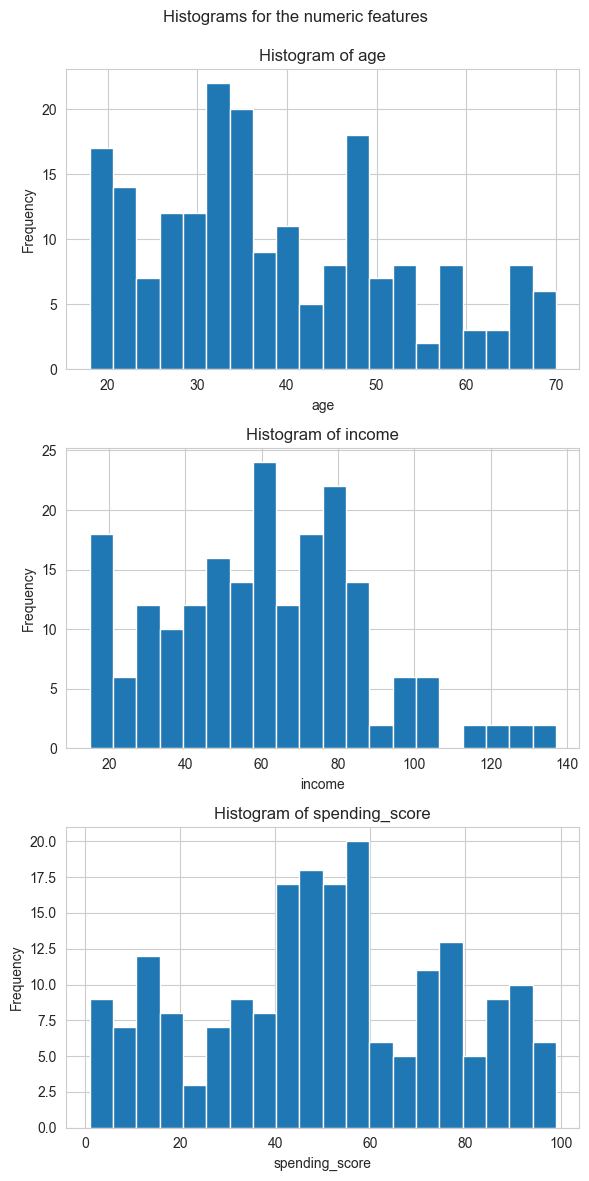

In [188]:
# --- Your code for 3 a) here --- #
fig, axes = plt.subplots(3, figsize=(6, 12))

# loop through the numeric features to draw histograms for each feature
for i, feature in enumerate(numeric_features):
    axes[i].hist(data[feature], bins=20)
    axes[i].set_title("Histogram of "+ feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

fig.suptitle("Histograms for the numeric features\n")
plt.tight_layout()


## 4. Plotting binary and categorical features

***Exercise 4 a)*** Plot **barplots** for each of the **non-numeric features** in the dataset. Make sure to **use fractions** instead of the actual frequencies of the categories.

 Tips:
- To create the barplots, refer to the documentation for `axes.bar`.
- To obtain the fractions of each category, use the `value_counts()` function with the `normalize` argument set to `True`. This will return the relative frequencies of each category (proportion of each category relative to the total).

In [189]:
### Your code for 4 a) here ###

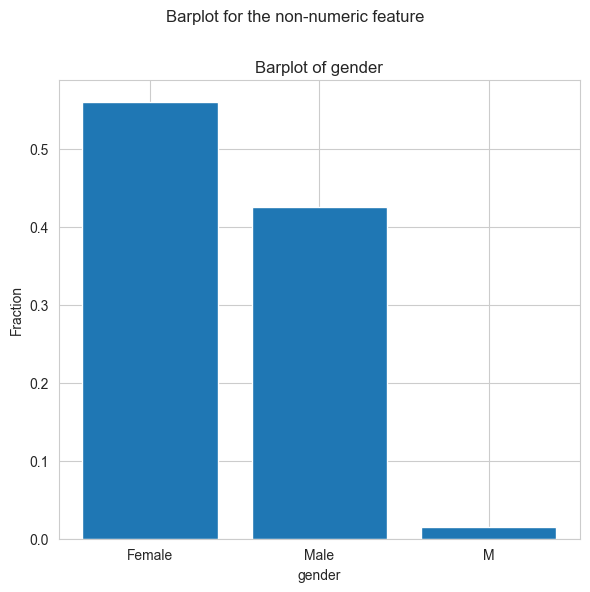

In [190]:
fig, axes = plt.subplots(1, figsize=(6, 6))

# obtain fraction of each category
fractions = data[categorical_features[0]].value_counts(normalize=True)

# plot the category fractions
axes.bar(fractions.index.astype(str), fractions.values)
axes.set_title("Barplot of "+ categorical_features[0])
axes.set_ylabel("Fraction")
axes.set_xlabel(categorical_features[0])
    
fig.suptitle("Barplot for the non-numeric feature\n")
plt.tight_layout()

**Exercise 4 b)** After reviewing the barplots above, Do you notice anything (unusual/irrelevant) with one of the features? If so, Let's try fix it.

If you have read the dtype of a categorical feature as `pandas` dtype `categorical`, you must also use the `remove_categories()` function to remove any unnecessary category levels.

To remove a specific category level, you can use the following example syntax:

```python
data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")


<font color="green">Your answer for 4 b)</font>
The feature gender should be a binary feature. So there shouldn't be any other categories other than female and male.
However, on the barplot you can see an irrelevant category "M". That can be removed.

In [191]:
### Your code for 4 b) here ###
# removes the irrevelant category
data["gender"] = data["gender"].cat.remove_categories("M")

The following code also works, but Pandas will still assume that "M" is a valid category, causing trouble with e.g. one-hot encoding of features:

In [192]:
#data.loc[data["gender"] == "M", "gender"] = "Male"

## 5. Feature generation and exploration

Feature Engineering is a crucial step in the process of preparing data for most data analysis projects. It involves creating new features or modifying existing ones to improve the performance of predictive models. Feature engineering is a combination of domain knowledge, creativity, and data analysis, and it can have a significant impact on the success of a data analysis project.


***Exercise 5 a)*** Age category. We are interested in segmenting the customers by behaviour. However, in terms of demographic groups, how much do 38 and 39 year olds differ? Create a feature that puts each customer in a wider age group, 5 different values should be about right. For example, "under 23", "23-29" and so forth. Name this feature `age_category`.

In [193]:
### Your code for 5 a) here ###
bins = [0, 23, 29, 39, 49, 100]  
labels = ["under 23", "23-29", "30-39", "40-49", "50+"] 

# creates new categorical feature and assigns each value into one of the defined bins
data["age_category"] = pd.cut(data["age"], bins=bins, labels=labels)

data[["age", "age_category"]].head()

,age,age_category
0,19,under 23
1,21,under 23
2,20,under 23
3,23,under 23
4,31,30-39


***Exercise 5 b)*** Similarly to age category, create a wage category feature. Use the name `income_category`.

In [194]:
### Your code for 5 b) here ###
bins = [0, 49, 99, 140]  
labels = ["Low", "Middle", "High"] 

# creates new categorical feature and assigns each value into one of the defined bins
data["income_category"] = pd.cut(data["income"], bins=bins, labels=labels)

data[["income", "income_category"]].head()

,income,income_category
0,15.0,Low
1,15.0,Low
2,16.0,Low
3,16.0,Low
4,17.0,Low



***Exercise 5 c)*** Create a pairwise countplot to visualize the distribution of spending score across age and wage categories.
Here, countplot refers to a type of bar plot that displays the frequency (count) of observations in each category of a categorical variable, visualizing the distribution of data by showing how many instances fall into each category. Seaborn has several functions for it (see plotting tutorial).

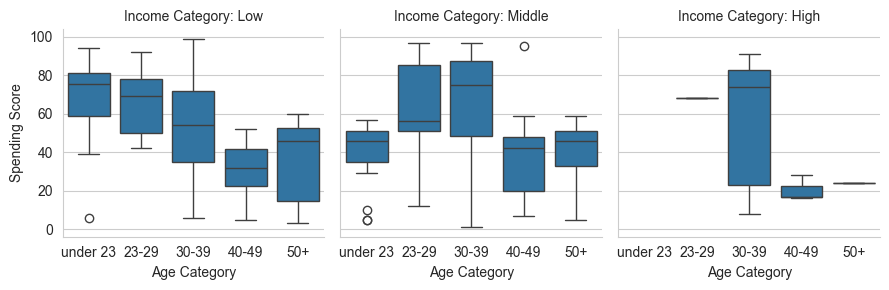

In [195]:
### Your code for 5 c) here ###

# Facetgrid with one column per income_category
g = sns.FacetGrid(data, col="income_category")

# Map a boxplot onto each facet
g.map_dataframe(sns.boxplot, x="age_category", y="spending_score")

g.set_axis_labels("Age Category", "Spending Score")
g.set_titles("Income Category: {col_name}")
plt.tight_layout()

***Exercise 5 d)*** Can you notice any relationship or visible trend?

Below, there is ready-made code for you to appropriatly add the newly created features to the right column type list. You don't need to change anything about the code, just make sure that the names of the added features are as specified earlier (`age_category` and `income_category`)

In [196]:
# ---- Add features to column type list (no need to change) --------
data['age_category'] = data['age_category'].astype('category')
data['income_category'] = data['income_category'].astype('category')
categorical_features += ["age_category", "income_category"]

**Answer 5d):**
People in the 30-39 age group show a high spending score in the middle and high income categories compared to the low one. In particular in the high income category this age group has much higher spending score compared to the others in this income category.

Under 23 old people have lower income. Those of them with low income have higher spending score than those with middle income.

People in the 23-29 age category have semi high spending score in all categories. 

40-49 old people have semi low spending score in all categories (about 20-40).

Older people have moderate income and also more moderate spending habits



## 6. Preprocessing numeric features

Scaling the data is a crucial step in the preprocessing phase of machine learning, as it can significantly improve algorithm performance. In many cases, if scaling is not applied, it may lead to poor performance. This is particularly true for distance-based algorithms covered in the course, such as PCA, t-SNE, KNN and Kmeans where features with larger values can dominate the distance calculations.


### Common Scaling Techniques:

In this exercise, we will explore two commonly used methods for scaling data:

1. **Min-Max Scaling to [0, 1]:** 
   - This technique rescales the feature values to a range between 0 and 1. It is particularly useful when you want to maintain the relationships between the values while fitting the data into a specific range. This method is often used in training neural networks, where matching the input range to the range of activation functions is important.

2. **Standardization :**
   - standardizing the features to 0 mean and unit variance. Standardizing values is very common in statistics.

### Available Functions:

To assist you in applying these scaling techniques, the following functions from the `sklearn` library have been imported for your use:

- `sklearn.preprocessing.minmax_scale`: For Min-Max Scaling.
- `sklearn.preprocessing.scale`: For Standardization.

A lot of example code you will see uses e.g. the `StandardScaler` class instead. That is needed if you want to apply the same scaling multiple times to different sets of data, such as training and test in machine learning.


**Exercise 6 a)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [197]:
# --- Your code for 6 a) here --- #
# min-max the numeric attributes
minmaxed = minmax_scale(data[numeric_features])
# store the results
data_min_maxed = pd.DataFrame(minmaxed, columns=numeric_features)
data_min_maxed.head()

,age,income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


**Exercise 6 b)** Standardize the numeric attributes of the dataset to have a mean of 0 and a standard deviation of 1. Store the standardized results in a new DataFrame called `data_standardized`.

In [198]:
# Your code for 6 b) here --- #
# standardize the numeric attributes
standardized = scale(data[numeric_features])
# store the results
data_standardized = pd.DataFrame(standardized, columns=numeric_features)
data_standardized.head()

,age,income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


**Exercise 6 c)** Create two boxplots for the numeric features: one using the `data_min_maxed` DataFrame and the other using the `data_standardized` DataFrame. Display the plots side-by-side and provide titles for each plot. See the plotting tutorial for help.

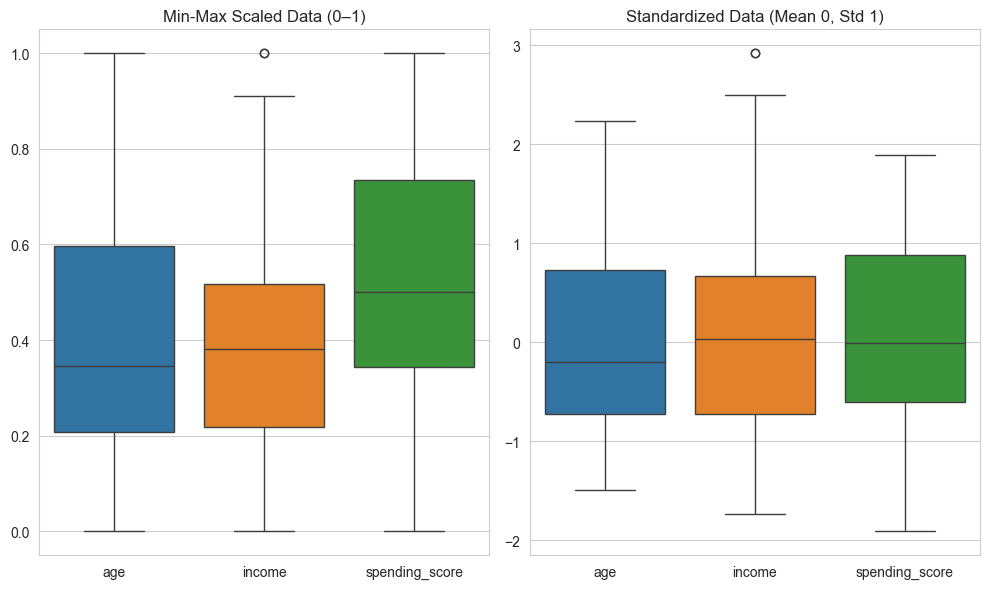

In [199]:
# Your code for 6 c) here --- #
fig, axes = plt.subplots(1,2, figsize = (10,6))

# Boxplot for min-max scaled data
sns.boxplot(data=data_min_maxed, ax=axes[0])
axes[0].set_title("Min-Max Scaled Data (0–1)")

# Boxplot for standardized data
sns.boxplot(data=data_standardized, ax=axes[1])
axes[1].set_title("Standardized Data (Mean 0, Std 1)")

plt.tight_layout()

**Execise 6 d)** Describe what you would expect to see in these two boxplots. How would the characteristics of the boxplots differ for min-max scaled data and standardized data?

_tip: Consider factors like the location of the mean, and the range of values presented.

**Answer:**
For the min-maxed data we would expect to see that all of the boxplots values would be between 0 and 1. This also means that the min value for each value is exactly 0 and max value 1. The mean varies for each feature, but it's somewhere between 0 and 1.

For the standardized data the mean becomes 0 for each feature. Therefore we expect these boxplots to be centered around 0. The range of the features varies depending of the feature. 


Let's compare the effects of these preprocessing methods on a dataset with an outlier. We'll replace the last data point with an outlier (a value significantly different from the rest) and then apply min-max scaling and standardization. Finally, we'll visualize the results to observe how each method handles the outlier. The code to add the value is given for you and you shouldn't change it.


***Exercise 6 e) Do the following:***
1. **Use the Provided Data:**
   - Start with the given data for the 'age' feature, which includes an outlier. This variable is referred to as `age_w_outlier`. The value of `age_w_outlier` is already set for you, so you don't need to modify it.

2. **Create Min-Max Scaled Variable:**
   - Use the `sklearn.preprocessing.minmax_scale` function to apply Min-Max scaling to `age_w_outlier`. Store the scaled values in a new variable named `age_w_outlier_minmaxed`.

3. **Create Standardized Variable:**
   - Use the `sklearn.preprocessing.scale` function to standardize the values of `age_w_outlier`. Store the standardized values in a new variable named `age_w_outlier_standardized`.


In [200]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [201]:
# --- Your code for 6 e) ---
age_w_outlier_minmaxed = minmax_scale(age_w_outlier)
age_w_outlier_standardized = scale(age_w_outlier)

4. **Plot:**
   - Below there is pre-written code for you to plot the different cases. The code should run if you have named your features appropriately. Run the code.

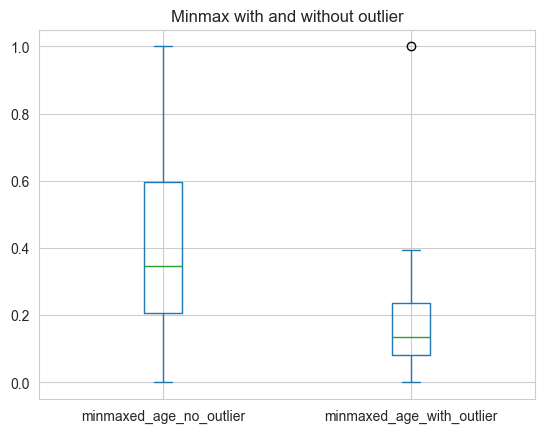

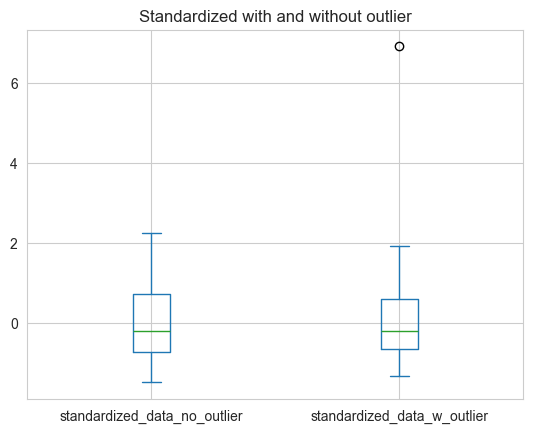

In [202]:
# (no need to change this code)
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_outlier_example = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age,
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized.
standardized_outlier_example = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age,
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_outlier_example[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_outlier_example[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')


**Exercise 6 f)** Look at the output of the above cell and think about the following:

1. Can you notice a difference between the two cases (min-maxed and standardized)?
2. Can you say something about the difference of the effect of min-maxing and standardization?

**Answer:** 

It's very clear that min-maxing is sensitive to outliers. Since all the values are between 0 and 1, with an extreme outlier, the normal values end up squeezed close to 0.

With standardization however, the difference between the data with and with no outlier isnt as drastic. Standardized data has mean = 0, so even with an outlier, the data is still centered around 0. Therefore the normal values don't get squeezed. 

With standardization the box shapes remain similar, was there an outlier or not. With min-maxing, if there's an outlier, the box can be squeezed near 0.

## 7. Agglomerative hierarchical clustering

Our earlier exploration already showed patterns in customer behavior, related to their demographics. This was based on handcrafted features that came from our expert knowledge - we can expect specific behaviours based on income and age. However, assuming some patterns exist, trying to find them automatically would also work if we _do not_ have this expert knowledge, also it may find things that go contrary to our assumptions. This is what unsupervised learning is about.

Start by plotting spending score (color) against age/income to have another look at how these attributes are related.


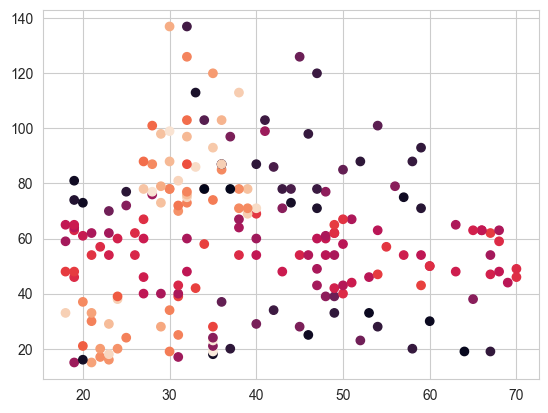

In [203]:
# No need to modify this code, just run it
fig, ax = plt.subplots()
ax.scatter(data["age"], data["income"], c=data["spending_score"])

**Exercise 7 a)**

Cluster the standardized data into 2-10 clusters using agglomerative hierarchical clustering. Observe that spending score is one of the input variables - this is not a mistake, we're not trying to do supervised learning here.

- Explore all combinations of the **number of clusters** (2-10) and the **linkage criteria**.
- Calculate the silhouette coefficient for each combination and store the results, as well as the predictions made by the clustering.


In [204]:
# --- Your code for 7 a) ---
# Utilized this code here:
# https://codesignal.com/learn/courses/hierarchical-clustering-deep-dive/lessons/understanding-linkage-criteria-in-hierarchical-clustering

# different linkage criteria
linkages = ["ward", "complete", "average", "single"]

# empty list to store the results
results = []   

# loop through the linkage methods
for linkage in linkages:
    for k in range(2, 11): 
        
        clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = clustering.fit_predict(data_standardized)

        # calculates the silhouette score
        score = silhouette_score(data_standardized , labels)

        # store the results
        results.append({
            "n_clusters": k,
            "linkage": linkage,
            "silhouette": score,
        })

results_df = pd.DataFrame(results)
results_df

,n_clusters,linkage,silhouette
0,2,ward,0.317957
1,3,ward,0.321489
2,4,ward,0.361451
3,5,ward,0.390028
4,6,ward,0.420117
5,7,ward,0.398295
6,8,ward,0.366479
7,9,ward,0.375385
8,10,ward,0.380889
9,2,complete,0.233025


**Exercise 7 b)**

- Use the silhouette score to determine the best linkage criterion for each number of clusters (2-10).
- For each number of clusters, display the best linkage criterion and the silhouette score, sorted by the score (high to low) as follows:

| Number of clusters | Linkage criterion | Silhouette score
| --- | --- | ---   

In [205]:
# --- Your code for 7 b) ---
table = (
    # sorts the results in descending order by silhouette score
    # select the first row of each number of clusters
    results_df
        .sort_values("silhouette", ascending=False)       
        .groupby("n_clusters")                            
        .first()                                           
        .reset_index() 
)
table.columns = ["Number of clusters", "Linkage criterion", "Silhouette score"]

table

,Number of clusters,Linkage criterion,Silhouette score
0,2,average,0.324936
1,3,average,0.339962
2,4,complete,0.390139
3,5,average,0.409569
4,6,ward,0.420117
5,7,ward,0.398295
6,8,average,0.375567
7,9,average,0.406859
8,10,average,0.395443


## 8. Cluster visualization

**Exercise 8 a)**

For visualization, project the data to two dimensions by using principal component analysis (PCA). These principal components are solely used for plotting the data. The clusterings are done on the original standardized features.

In [206]:
# --- Your code for 8 a) ---

pca = PCA(n_components=2)
# fit PCA on the standardized data
pca_result = pca.fit_transform(data_standardized)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

pca_df.head()


,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


**Exercise 8 b)**

Create a scatter plot of the data in the 2-dimensional projection created by the PCA.

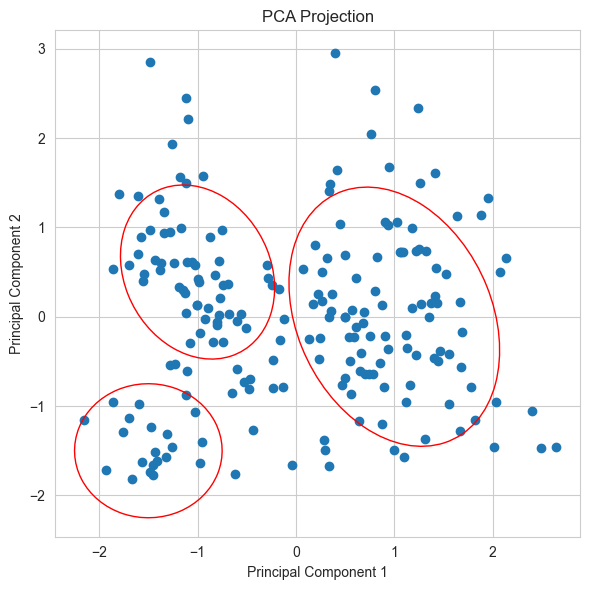

In [207]:
# --- Your code for 8 b) ---

# creates a scatter plot
fig, axes = plt.subplots(figsize=(6,6))

axes.scatter(pca_df["PC1"], pca_df["PC2"])
axes.set_xlabel("Principal Component 1")
axes.set_ylabel("Principal Component 2")
axes.set_title("PCA Projection")

# shapes to visualize clusters
ellipse1 = Ellipse(
    xy=(-1, 0.5),       
    width=1.5,          
    height=2,         
    angle=20,         
    edgecolor="red",
    facecolor="none"
)
axes.add_patch(ellipse1)

ellipse2 = Ellipse(
    xy=(1, 0),        
    width=2,
    height=3,
    angle=20,
    edgecolor="red",
    facecolor="none"
)
axes.add_patch(ellipse2)

ellipse3 = Ellipse(
    xy=(-1.5, -1.5),        
    width=1.5,
    height=1.5,
    angle=-20,
    edgecolor="red",
    facecolor="none"
)
axes.add_patch(ellipse3)

plt.tight_layout()

 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect. (You can add to the code you created above for the scatter plot.)

**Exercise 8 c)**

- Plot four clusterings with **five clusters**, one of each **linkage criterion**, as scatter plots.
 - Again, use the first two PCs for visualization. 
 - Colour the datapoints according to the clusters they were assigned to.
 - The structure of the plot is provided

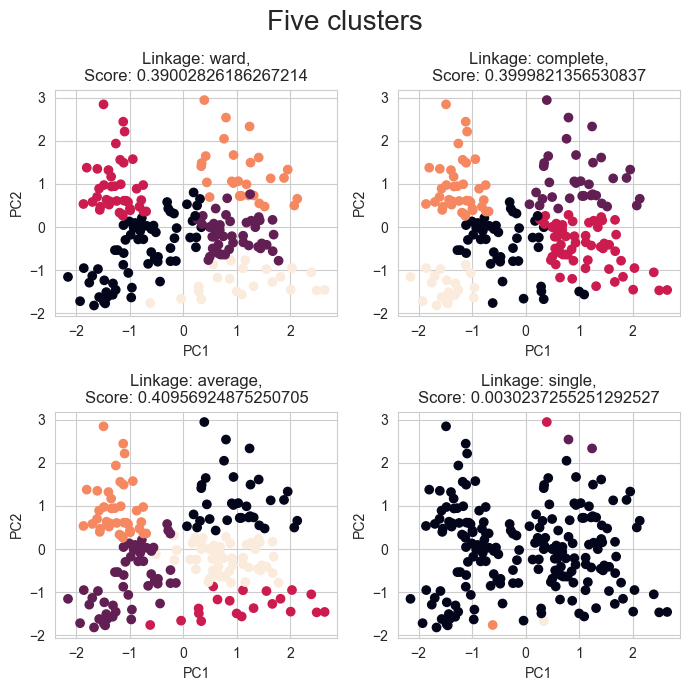

In [208]:
# --- Your code for 8 c) ---

# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Five clusters", fontsize=20)

axes = axes.flatten() # creates a single array from a 2D-matrix

linkages = ["ward", "complete", "average", "single"]

for i, ax in enumerate(axes):
    # scatter plot the data points in the PCA space, set color by cluster
    # linkage=
    # score=

    # select current linkage method
    linkage = linkages[i]

    clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage)

    labels = clustering.fit_predict(data_standardized)              
    score = silhouette_score(data_standardized, labels)             

    # scatter plot the PCA-transformed data, colored by cluster labels
    ax.scatter(pca_df["PC1"], pca_df["PC2"], c=labels)
    
    ax.set_title(f"Linkage: {linkage},\nScore: {score}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.tight_layout()

**Exercise 8 d)**

Effect of number of clusters:

From the clusterings using **'ward'** linkage criterion, plot the four clusterings of best performing **number of clusters** as scatter plots. Use the same style of 2x2 axes plot.

In [209]:
# --- Your code for 8 d) ---
ward_results = results_df[results_df["linkage"] == "ward"].sort_values("silhouette", ascending=False)

# Get the top 4 n_clusters for ward linkage
top4 = ward_results.head(4)

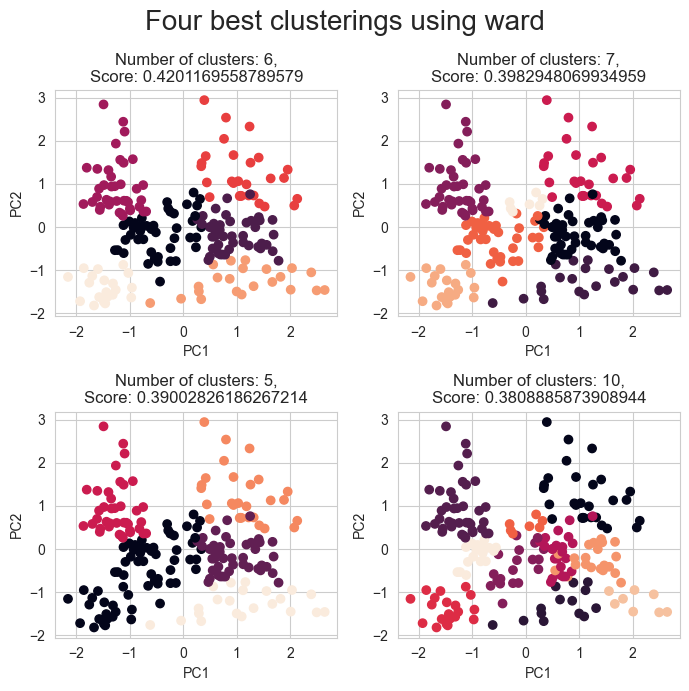

In [210]:
# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Four best clusterings using ward", fontsize=20)

axes = axes.flatten() # creates a single array from a 2D-matrix

for i, ax in enumerate(axes):
    # scatter plot the data points in the PCA space, set color by cluster
    # n_clust=
    # score=
    row = top4.iloc[i]

    n_clust = row["n_clusters"]
    score = row["silhouette"]

    clustering = AgglomerativeClustering(n_clusters=n_clust, linkage="ward")
    labels = clustering.fit_predict(data_standardized)

    # scatter plot the PCA-transformed data, colored by cluster labels
    ax.scatter(pca_df["PC1"], pca_df["PC2"], c=labels)

    ax.set_title(f"Number of clusters: {n_clust},\nScore: {score}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")


plt.tight_layout()

**Exercise 8 e)**

Based on your own interpretation of the projection plot (see Exercise 8 b), do you agree with the silhouette coefficient measures of which clustering captures the different kinds of customers the best?

**Answer:**

Clearly my own interpration wasn't exactly similar as the silhouette coefficients measured. I mostly agree with them though. Especially the ones with 5, 6 and 7 clusters show similar patterns that I found in the exercise 8 b.

## 9. _k_-means clustering

**Exercise 9 a)**

- Perform _k_-means clustering on the standardized data. Try 2-10 numbers of clusters.
- Evaluate the clustering performance using the silhouette coefficient.
- Store the centroids of the clusters

In [211]:
# --- Your code for 9 a) ---

# empty list for storing the results
results_kmeans = []

# loop through the clusters
for k in range(2, 11):   
    kmeans = KMeans(n_clusters=k, n_init=10)
    # fit themodel to the standardized data
    labels = kmeans.fit_predict(data_standardized)

    score = silhouette_score(data_standardized, labels)

    # store the results
    results_kmeans.append({
        "n_clusters": k,
        "silhouette": score,
        "centroids": kmeans.cluster_centers_
    })

# convert to DataFrame for easy inspection
results_kmeans_df = pd.DataFrame(results_kmeans)

results_kmeans_df

,n_clusters,silhouette,centroids
0,2,0.335472,"[[0.7089225088349755, -0.0024754542414313096, ..."
1,3,0.357793,"[[0.8916814030904597, 0.047413981028320076, -0..."
2,4,0.403958,"[[0.037205362805285754, 0.9901149927157746, -1..."
3,5,0.416643,"[[1.2048405635785846, -0.235773376109552, -0.0..."
4,6,0.428417,"[[-0.44191719296133997, 0.9915830476839198, 1...."
5,7,0.418077,"[[0.612338725728442, -0.1403736889305417, -0.1..."
6,8,0.410983,"[[-0.44191719296133997, 0.9915830476839198, 1...."
7,9,0.416056,"[[-0.9780204987399659, 0.5681307479834026, -1...."
8,10,0.402293,"[[-0.4589806016952966, 1.81769761612193, 1.262..."


**Exercise 9 b)**

 - Choose the four best numbers of clusters according to silhouette coefficient that you discovered above.
 - Once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot.
 - Remember to transform the centroids to the 2-d projected space.

Explain why you need to transform the centroids.

**Answer:**

The centroids need to be transformed because the data in use is originally in 3-d space (because there's 3 variables: age, income. spending score). The scatter plot uses 2-d PCA projection. So, if we tried to put the raw centroids we got from the K-means, they wouldn't line up properly in the 2-d space.

In [212]:
# --- Your code for 9 b) ---
# four best number of clusters
top4 = results_kmeans_df.nlargest(4, "silhouette")

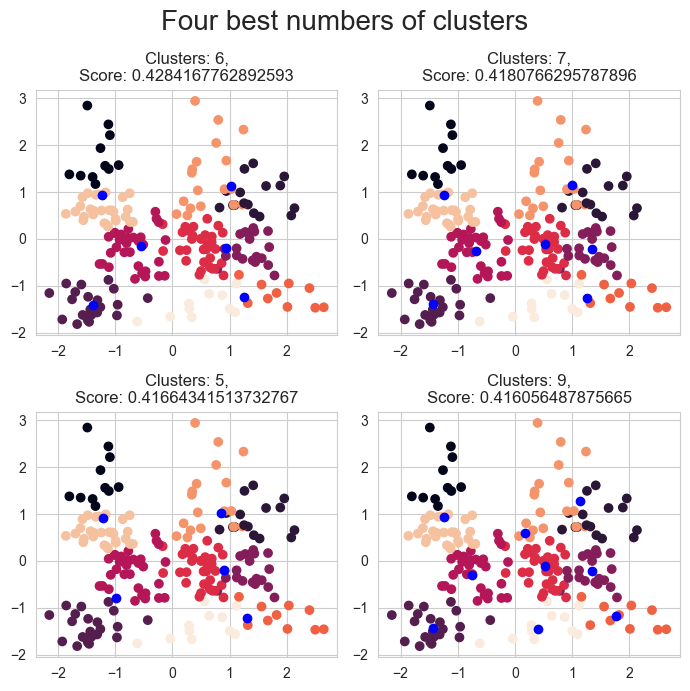

In [213]:
# use the same plot layout as 8 c, 8 d

# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Four best numbers of clusters", fontsize=20)

axes = axes.flatten() # creates a single array from a 2D-matrix

# loop over the axes and the top 4 results
for i, ax in enumerate(axes):
    row = top4.iloc[i]
    k = row["n_clusters"]
    centroids = row["centroids"]
    score = row["silhouette"]

    # transforms the centroids into 2d PCA space
    centroids_2d = centroids.dot(pca.components_.T)[:, :2]

    # Plots all data points into PCA space colored by cluster labels
    ax.scatter(
        pca_df["PC1"],
        pca_df["PC2"],
        c=labels
    )

    # adds blue dots to represent centroids
    ax.scatter(
        centroids_2d[:, 0],
        centroids_2d[:, 1],
        c="blue"
    )
    
    ax.set_title(f"Clusters: {k},\nScore: {score}")

plt.tight_layout()

## 10. Interpretation

Earlier, we were able to see some patterns in behaviour by manual exploration and handcrafted features. Let's try to interpret the automatically created clustering now

**Exercise 10 a)**
- select the best clustering result from either K-means or agglomerative. One way to choose would again be based on the silhouette score.
- assign the cluster labels to the variable `labels` (in 8 c you already needed the cluster labels, you can refer to that exercise).
- create a dataframe with the column `cluster` as the labels from the clustering  and the numerical features as the other columns using the ready-made code below


In [214]:
# --- Your code for 10 a) ---

# k-means with 6 clusters has the best silhouette score

best_kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
labels = best_kmeans.fit_predict(data_standardized)

In [215]:
# run this ready-made code to create the dataframe.
spending = pd.DataFrame({"cluster": labels, "spending": data["spending_score"],
                         "age": data["age"], "income": data["income"]})

**Exercise 10 b)**

Create a boxplot of the spending dataframe with column "cluster" as the x axis and "spending" as the y axis. This is very easy to do with Seaborn.

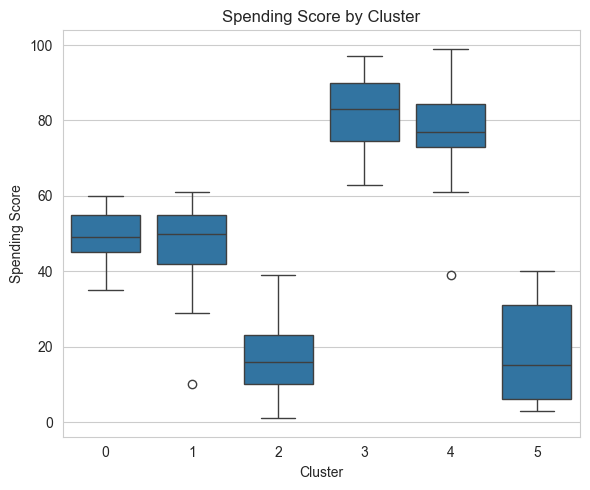

In [216]:
# --- Your code for 10 b) ---

plt.figure(figsize=(6,5))
sns.boxplot(x="cluster", y="spending", data=spending)
plt.xlabel("Cluster")
plt.ylabel("Spending Score")
plt.title("Spending Score by Cluster")
plt.tight_layout()

**Exercise 10 c)**

Create a boxplot of the spending dataframe with column "cluster" as the x axis and "age" as the y axis.

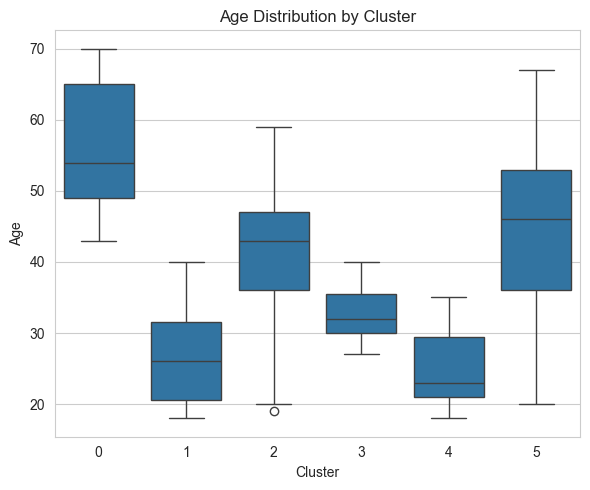

In [217]:
# --- Your code for 10 c) ---
plt.figure(figsize=(6,5))
sns.boxplot(x="cluster", y="age", data=spending)
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Age Distribution by Cluster")
plt.tight_layout()

**Exercise 10 d)**

Create a boxplot of the spending dataframe with column "cluster" as the x axis and "income" as the y axis.

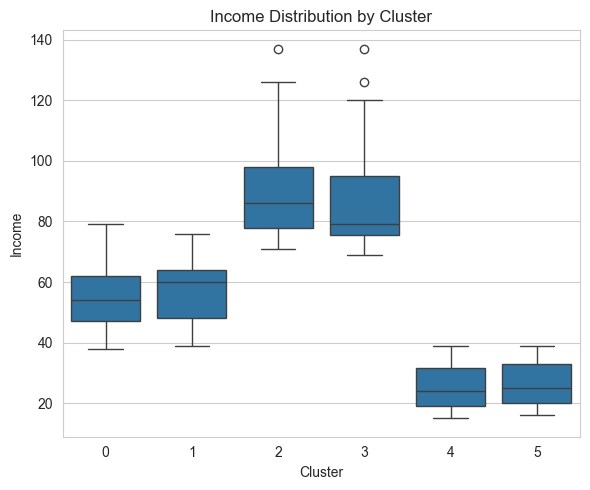

In [218]:
# --- Your code for 10 d) ---
plt.figure(figsize=(6,5))
sns.boxplot(x="cluster", y="income", data=spending)
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.title("Income Distribution by Cluster")
plt.tight_layout()

**Exercise 10 e)**

Do the clusters represent different demographic groups with different behaviours? Do these clusters represent the same patters as you observed in exercise 5 d? Are they better, similar or worse?

**ANSWER:**

The clusters possibly do represent different groups and behaviours. Here's some patterns I found:

Cluster 0: Older people (about 50-65), quite moderate income and spending score. Possibly older moderate customers, not very high spenders.

Cluster 1: Younger adults (about 20-30), moderate income and spending score. Similar to cluster 0 just younger age. Could be students for example.

Cluster 2: Middle aged people (35-45), low spending score but high income. High income customers who like to spend much less. People who like to be more selective shoppers possibly.

Cluster 3: About 30 to 35 year old people, high income and spending score. Adults who get paid well and like to spend a lot. Basically ideal shopping centre customers.

Cluster 4: Young adults (about 20-30), high spending score but low income. Could be more impulsive younger customers who earn less but like to spend more.

Cluster 5: Middle aged to older people (about 35-55), semi low spending score and low income. Possibly older customers who like to consider their budget due to lower income.

As compared to exercise 5, i think the clusters represent the patterns I found better. There is existing similarities, but the clusters found some more variation and detail in general.

***END OF REQUIRED PARTS***

<div class="alert alert-block alert-warning">
    <h1><center> BONUS EXERCISE </center></h1>

- Below is the bonus exercise. You can stop here, and get the "pass" grade.
- By doing the bonus exercise below, you can get a "pass with honors", which means you will get one point bonus for the exam.
- Your work should demonstrate that you have tried to understand the problem. Use code, plots and **add text to explain the results in your own words**.

## Using categorical features

Gender seems like a good attribute to segment customers by. We have not used the `gender` attribute up to this point. Why not?

Clustering is about the similarity of data points. For our algorithms we define similarity through distance measures. But what is the distance between "Female" and "Male" genders? Also, is this distance smaller or bigger than the distance between ages 24 and 44? These questions do not have meaningful general answers, but to use e.g. K-means we need to provide some numeric value.

There is no single correct solution to this problem. It is not even certain that including gender improves the results of the segmentation. Try to find something that works with our shopping center data set.


***Exercise***

Create a clustering that makes good use of both the numerical features and the gender attribute.

Starting ideas:
- use one-hot encoding to convert the `gender` to a numerical feature. Cluster "as is" and draw conclusions
- you can use techniques you used with agglomerative and k-means clustering exercises to find some solution to the distance problem discussed above


In [ ]:
# --- Your solution follows ---
